In [1]:
from scipy.stats import kendalltau
import pandas as pd
import numpy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data_cosin_ids = pd.read_pickle(r'cosine_retrieved_ids.pkl')
data_inner_ids = pd.read_pickle(r'inner_product_retrieved_ids.pkl')
essentia_cosin_ids = pd.read_pickle(r'essentia_cosine_retrieved_ids.pkl')
essentia_inner_ids = pd.read_pickle(r'essentia_inner_product_retrieved_ids.pkl')
mfcc_cosin_ids = pd.read_pickle(r'mfcc_bow_cosine_retrieved_ids.pkl')
mfcc_inner_ids = pd.read_pickle(r'mfcc_bow_inner_product_retrieved_ids.pkl')
resnet_cosin_ids = pd.read_pickle(r'resnet_cosine_retrieved_ids.pkl')
resnet_inner_ids = pd.read_pickle(r'resnet_inner_product_retrieved_ids.pkl')
vgg_cosin_ids = pd.read_pickle(r'vgg19_cosine_retrieved_ids.pkl')
vgg_inner_ids = pd.read_pickle(r'vgg19_inner_product_retrieved_ids.pkl')

-------------------------------------- correlation by value list ---------------------------------------

In [3]:
data_cosin_list = list(data_cosin_ids.values())
data_inner_list = list(data_inner_ids.values())
ess_cosin_list = list(essentia_cosin_ids.values())
ess_inner_list = list(essentia_inner_ids.values())
mfcc_cosin_list = list(mfcc_cosin_ids.values())
mfcc_inner_list = list(mfcc_inner_ids.values())
resnet_cosin_list = list(resnet_cosin_ids.values())
resnet_inner_list = list(resnet_inner_ids.values())
vgg_cosin_list = list(vgg_cosin_ids.values())
vgg_inner_list = list(vgg_inner_ids.values())

In [4]:
results_to_compare = [data_cosin_list, data_inner_list, ess_cosin_list, ess_inner_list, mfcc_cosin_list, mfcc_inner_list,
                      resnet_cosin_list, resnet_inner_list, vgg_cosin_list, vgg_inner_list]
results_to_compare_name = ['data_cosin', 'data_inner', 'ess_cosin', 'ess_inner', 'mfcc_cosin', 'mfcc_inner', 'resnet_cosin', 'resnet_inner', 
                           'vgg_cosin', 'vgg_inner']

In [5]:
corr_df_small = pd.DataFrame()

l = -1

for i in tqdm(results_to_compare):
    corr_list_small = []
    l +=1
    m = -1
    for j in results_to_compare:
        m +=1
        corr, _ = kendalltau(i[0:100], j[0:100])
        corr_list_small.append(corr)
    corr_df_small[results_to_compare_name[l]] = corr_list_small


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.22it/s]


In [6]:
corr_df_small

,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,1.000000,0.007694,0.003462,0.018593,-0.011018,0.001364,0.010016,0.005802,-0.006635,0.013953
1,0.007694,1.000000,0.011991,0.001238,0.000191,-0.007243,0.002945,-0.003646,-0.001154,0.008495
2,0.003462,0.011991,1.000000,0.000140,0.001849,-0.006243,-0.001501,-0.003389,-0.003624,0.002507
3,0.018593,0.001238,0.000140,1.000000,0.004847,0.011383,-0.002236,-0.011746,0.008118,0.016351
4,-0.011018,0.000191,0.001849,0.004847,1.000000,-0.004311,-0.000317,0.005846,0.007594,0.004204
5,0.001364,-0.007243,-0.006243,0.011383,-0.004311,1.000000,0.002907,-0.005831,0.008006,-0.002686
6,0.010016,0.002945,-0.001501,-0.002236,-0.000317,0.002907,1.000000,0.002376,0.004759,-0.005371
7,0.005802,-0.003646,-0.003389,-0.011746,0.005846,-0.005831,0.002376,1.000000,-0.004772,0.002478
8,-0.006635,-0.001154,-0.003624,0.008118,0.007594,0.008006,0.004759,-0.004772,1.000000,0.012755
9,0.013953,0.008495,0.002507,0.016351,0.004204,-0.002686,-0.005371,0.002478,0.012755,1.000000


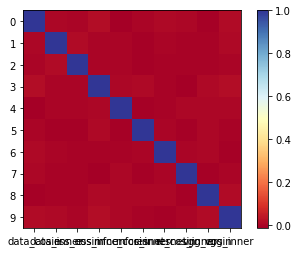

In [7]:
plt.imshow(corr_df_small, cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(corr_df_small)), corr_df_small.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(corr_df_small)), corr_df_small.index)
  
# Displaying the figure
plt.show()

In [8]:
corr_df = pd.DataFrame()

l = -1

for i in tqdm(results_to_compare):
    corr_list = []
    l +=1
    m = -1
    for j in results_to_compare:
        m +=1
        corr, _ = kendalltau(i, j)
        corr_list.append(corr)
    corr_df[results_to_compare_name[l]] = corr_list
    

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\agnes\miniconda3\envs\mlst_a0\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [41:14<00:00, 247.49s/it]


In [9]:
corr_df

,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,1.000000,0.004729,-0.000409,0.000180,0.000337,0.000428,-0.000224,0.000144,0.000050,0.000198
1,0.004729,1.000000,0.000703,0.000605,-0.000021,0.000040,0.000149,0.000340,-0.000087,-0.000037
2,-0.000409,0.000703,1.000000,-0.000447,0.000178,-0.000296,-0.000055,-0.000117,0.000071,-0.000041
3,0.000180,0.000605,-0.000447,1.000000,0.000350,0.000454,-0.000470,0.000407,-0.000345,0.000313
4,0.000337,-0.000021,0.000178,0.000350,1.000000,0.001342,0.000189,-0.000158,0.000239,-0.000260
5,0.000428,0.000040,-0.000296,0.000454,0.001342,1.000000,-0.000047,0.000340,0.000117,-0.000116
6,-0.000224,0.000149,-0.000055,-0.000470,0.000189,-0.000047,1.000000,0.007151,0.006646,0.002783
7,0.000144,0.000340,-0.000117,0.000407,-0.000158,0.000340,0.007151,1.000000,0.002982,0.002920
8,0.000050,-0.000087,0.000071,-0.000345,0.000239,0.000117,0.006646,0.002982,1.000000,0.005757
9,0.000198,-0.000037,-0.000041,0.000313,-0.000260,-0.000116,0.002783,0.002920,0.005757,1.000000


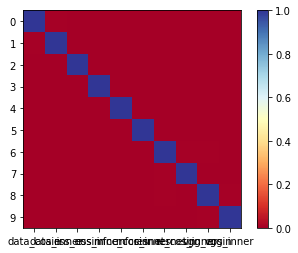

In [10]:
plt.imshow(corr_df, cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(corr_df)), corr_df.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(corr_df)), corr_df.index)
  
# Displaying the figure
plt.show()

In [11]:
new_data = ['data_cosin', 'data_inner', 'ess_cosin', 'ess_inner', 'mfcc_cosin', 'mfcc_inner', 'resnet_cosin', 'resnet_inner', 'vgg_cosin', 'vgg_inner']
corr_df.insert(0, "correlation", new_data)
corr_df

,correlation,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,data_cosin,1.000000,0.004729,-0.000409,0.000180,0.000337,0.000428,-0.000224,0.000144,0.000050,0.000198
1,data_inner,0.004729,1.000000,0.000703,0.000605,-0.000021,0.000040,0.000149,0.000340,-0.000087,-0.000037
2,ess_cosin,-0.000409,0.000703,1.000000,-0.000447,0.000178,-0.000296,-0.000055,-0.000117,0.000071,-0.000041
3,ess_inner,0.000180,0.000605,-0.000447,1.000000,0.000350,0.000454,-0.000470,0.000407,-0.000345,0.000313
4,mfcc_cosin,0.000337,-0.000021,0.000178,0.000350,1.000000,0.001342,0.000189,-0.000158,0.000239,-0.000260
5,mfcc_inner,0.000428,0.000040,-0.000296,0.000454,0.001342,1.000000,-0.000047,0.000340,0.000117,-0.000116
6,resnet_cosin,-0.000224,0.000149,-0.000055,-0.000470,0.000189,-0.000047,1.000000,0.007151,0.006646,0.002783
7,resnet_inner,0.000144,0.000340,-0.000117,0.000407,-0.000158,0.000340,0.007151,1.000000,0.002982,0.002920
8,vgg_cosin,0.000050,-0.000087,0.000071,-0.000345,0.000239,0.000117,0.006646,0.002982,1.000000,0.005757
9,vgg_inner,0.000198,-0.000037,-0.000041,0.000313,-0.000260,-0.000116,0.002783,0.002920,0.005757,1.000000


In [12]:
new_data = ['data_cosin', 'data_inner', 'ess_cosin', 'ess_inner', 'mfcc_cosin', 'mfcc_inner', 'resnet_cosin', 'resnet_inner', 'vgg_cosin', 'vgg_inner']
corr_df_small.insert(0, "correlation", new_data)
corr_df_small

,correlation,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,data_cosin,1.000000,0.007694,0.003462,0.018593,-0.011018,0.001364,0.010016,0.005802,-0.006635,0.013953
1,data_inner,0.007694,1.000000,0.011991,0.001238,0.000191,-0.007243,0.002945,-0.003646,-0.001154,0.008495
2,ess_cosin,0.003462,0.011991,1.000000,0.000140,0.001849,-0.006243,-0.001501,-0.003389,-0.003624,0.002507
3,ess_inner,0.018593,0.001238,0.000140,1.000000,0.004847,0.011383,-0.002236,-0.011746,0.008118,0.016351
4,mfcc_cosin,-0.011018,0.000191,0.001849,0.004847,1.000000,-0.004311,-0.000317,0.005846,0.007594,0.004204
5,mfcc_inner,0.001364,-0.007243,-0.006243,0.011383,-0.004311,1.000000,0.002907,-0.005831,0.008006,-0.002686
6,resnet_cosin,0.010016,0.002945,-0.001501,-0.002236,-0.000317,0.002907,1.000000,0.002376,0.004759,-0.005371
7,resnet_inner,0.005802,-0.003646,-0.003389,-0.011746,0.005846,-0.005831,0.002376,1.000000,-0.004772,0.002478
8,vgg_cosin,-0.006635,-0.001154,-0.003624,0.008118,0.007594,0.008006,0.004759,-0.004772,1.000000,0.012755
9,vgg_inner,0.013953,0.008495,0.002507,0.016351,0.004204,-0.002686,-0.005371,0.002478,0.012755,1.000000


-------------------- Mean correlation (kendalltau) by song -------------------------------

In [19]:
keys = data_cosin_ids.keys()
random.seed(15)
random_keys_small = random.sample(keys, 100)

random_keys = keys

C:\Users\agnes\AppData\Local\Temp/ipykernel_9628/458426236.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_keys_small = random.sample(keys, 100)


In [14]:
dict_to_compare = [data_cosin_ids, data_inner_ids, essentia_cosin_ids, essentia_inner_ids, mfcc_cosin_ids, mfcc_inner_ids,
                      resnet_cosin_ids, resnet_inner_ids, vgg_cosin_ids, vgg_inner_ids]

In [20]:
random_corr_df_small = pd.DataFrame()
l = -1

for i in tqdm(dict_to_compare):
    corr_list = []
    l += 1
    count = 0
    for j in dict_to_compare:
        correlation = 0
        count = 0
        for k in random_keys_small:
            count += 1
            corr, _ = kendalltau(i.get(k), j.get(k))
            correlation = correlation + corr
        cor = correlation/count
        corr_list.append(cor)
    random_corr_df_small[results_to_compare_name[l]] = corr_list


random_corr_df_small
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.01it/s]


,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,1.000000,-0.002792,0.008448,0.001964,-0.002671,-0.002735,-0.002764,-0.000517,0.003673,-0.005568
1,-0.002792,1.000000,-0.006820,-0.012933,0.007588,-0.001560,-0.016707,0.003915,-0.009576,0.005653
2,0.008448,-0.006820,1.000000,-0.005321,0.005390,-0.009899,-0.000562,0.001143,0.002440,-0.008982
3,0.001964,-0.012933,-0.005321,1.000000,0.009822,0.001523,-0.003943,-0.002861,-0.007980,-0.011790
4,-0.002671,0.007588,0.005390,0.009822,1.000000,-0.008776,0.001030,-0.004521,0.010667,0.007543
5,-0.002735,-0.001560,-0.009899,0.001523,-0.008776,1.000000,-0.017119,-0.005006,-0.004630,0.011172
6,-0.002764,-0.016707,-0.000562,-0.003943,0.001030,-0.017119,1.000000,0.001859,-0.000465,0.004954
7,-0.000517,0.003915,0.001143,-0.002861,-0.004521,-0.005006,0.001859,1.000000,0.016053,0.010319
8,0.003673,-0.009576,0.002440,-0.007980,0.010667,-0.004630,-0.000465,0.016053,1.000000,0.002889
9,-0.005568,0.005653,-0.008982,-0.011790,0.007543,0.011172,0.004954,0.010319,0.002889,1.000000


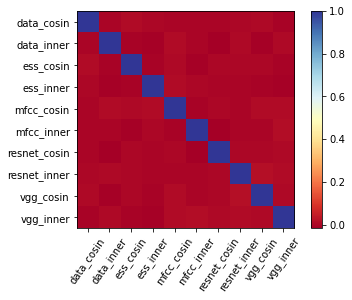

In [27]:
plt.imshow(random_corr_df_small, cmap ="RdYlBu")   

# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(random_corr_df_small)), random_corr_df_small.columns, rotation=55)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(random_corr_df_small)), random_corr_df_small.columns)


# Displaying the figure
plt.show()

In [17]:
corr_df_by_song = pd.DataFrame()
l = -1

for i in tqdm(dict_to_compare):
    corr_list = []
    l += 1
    count = 0
    for j in dict_to_compare:
        correlation = 0
        count = 0
        for k in random_keys:
            count += 1
            corr, _ = kendalltau(i.get(k), j.get(k))
            correlation = correlation + corr
        cor = correlation/count
        corr_list.append(cor)
    corr_df_by_song[results_to_compare_name[l]] = corr_list


corr_df_by_song
    

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [55:17<00:00, 331.74s/it]


,data_cosin,data_inner,ess_cosin,ess_inner,mfcc_cosin,mfcc_inner,resnet_cosin,resnet_inner,vgg_cosin,vgg_inner
0,1.000000,0.002752,-0.000485,0.000227,0.000399,0.000522,-0.000226,0.000245,0.000092,0.000191
1,0.002752,1.000000,0.000666,0.000546,0.000033,0.000030,0.000139,0.000326,-0.000109,-0.000113
2,-0.000485,0.000666,1.000000,-0.000429,0.000186,-0.000245,-0.000044,-0.000108,0.000121,0.000007
3,0.000227,0.000546,-0.000429,1.000000,0.000294,0.000463,-0.000422,0.000388,-0.000363,0.000278
4,0.000399,0.000033,0.000186,0.000294,1.000000,-0.000050,0.000250,-0.000121,0.000288,-0.000302
5,0.000522,0.000030,-0.000245,0.000463,-0.000050,1.000000,-0.000042,0.000332,0.000096,-0.000166
6,-0.000226,0.000139,-0.000044,-0.000422,0.000250,-0.000042,1.000000,0.004471,0.004972,0.002141
7,0.000245,0.000326,-0.000108,0.000388,-0.000121,0.000332,0.004471,1.000000,0.002154,0.002680
8,0.000092,-0.000109,0.000121,-0.000363,0.000288,0.000096,0.004972,0.002154,1.000000,0.003773
9,0.000191,-0.000113,0.000007,0.000278,-0.000302,-0.000166,0.002141,0.002680,0.003773,1.000000


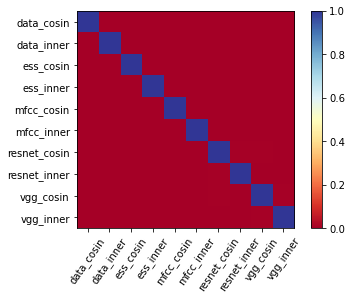

In [28]:
plt.imshow(corr_df_by_song, cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(corr_df_by_song)), corr_df_by_song.columns, rotation=55)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(corr_df_by_song)), corr_df_by_song.columns)
  
# Displaying the figure
plt.show()